# Let's look at 311 Complaints Data!

New York City is a wonderful place full of go-getting nerds who love to complain! The [NYC Open Data Portal](https://opendata.cityofnewyork.us/) makes all of this beautiful, beautiful angst available to our prying eyes. To get us started, I downloaded about [11 GB csv](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9) of 311 data from 2010 to now. That's just too much data for us right now, so I decided to filter that data down to just **December 2018**. That's only ~200k complaints (lol). 

I did this using a set of command line tools called `csvkit`. We won't cover that here, but just for your reference, here is what I did to filter the data:

1. Install csvkit: `pip3 install csvkit`

2. Check out the first 5 rows of my 311 csv file: `head -n 5 311_Service_Requests_from_2010_to_Present.csv`

3. Use the "csvgrep" command to filter the "Created Date" column by a regular expression representing December 2018 & save it to a new csv called "december-2018.csv":   `csvgrep --columns Created\ Date --regex "12\/\d{2}\/2018.+" 311_Service_Requests_from_2010_to_Present.csv > december-2018.csv`

For this workshop, we're just going to play around with this slice of data!

## Import libraries

For most data analysis, the python universe relies heavily on a few libraries: `pandas`, `numpy`, and `matplotlib`. Below, we are are importing several libraries we will need later on. Notice that some libaries we are renaming. For example, by convention, we import pandas `as pd` and will refer to it as such throughout the notebook. 

For other libraries, we are only importing particular functions. For example, from the library `datetime`, we are only importing the `timedelta` function (`from datetime import timedelta`). 

A few of the other lines are acting almost like settings. For example, `plt.style.use('ggplot')` tells matplotlib (which we have named `plt`) to use a particular display style (`ggplot`) when it renders charts.

In [2]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt 
%matplotlib inline
plt.style.use('ggplot')

import dateutil.parser
from dateutil.parser import parse
from datetime import timedelta

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

## Read in the data

In [3]:
df = pd.read_csv("data/december-2018.csv")

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (8,17,31,32,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Begin to explore the dataset

In [4]:
df

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,41689447,12/31/2018 11:03:24 AM,02/13/2019 03:25:33 PM,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,GARBAGE/RECYCLING STORAGE,RESIDENTIAL BUILDING,10075,228 EAST 80 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.774629,-73.956017,"(40.77462876729128, -73.95601696428179)"
1,41689506,12/18/2018 03:01:12 PM,02/13/2019 06:25:26 AM,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,MOLD,RESIDENTIAL BUILDING,10032,3860 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.836646,-73.942973,"(40.83664559933927, -73.94297329722913)"
2,41689558,12/27/2018 02:59:24 PM,02/13/2019 02:48:51 PM,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,MOLD,RESIDENTIAL BUILDING,10034,152 SHERMAN AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.864627,-73.923188,"(40.86462736420933, -73.92318763020528)"
3,41690447,12/15/2018 10:02:09 AM,02/13/2019 12:38:44 PM,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,MOLD,RESIDENTIAL BUILDING,10304,195 STEUBEN STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.608930,-74.083235,"(40.60893006814895, -74.08323502426971)"
4,41690448,12/13/2018 01:05:18 PM,02/13/2019 01:24:49 PM,HPD,Department of Housing Preservation and Develop...,FLOORING/STAIRS,FLOOR,RESIDENTIAL BUILDING,10459,950 ALDUS STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.823099,-73.891184,"(40.82309887414401, -73.89118353049265)"
5,41691184,12/15/2018 10:02:09 AM,02/13/2019 12:38:44 PM,HPD,Department of Housing Preservation and Develop...,PLUMBING,BASIN/SINK,RESIDENTIAL BUILDING,10304,195 STEUBEN STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.608930,-74.083235,"(40.60893006814895, -74.08323502426971)"
6,41691189,12/13/2018 01:05:18 PM,02/13/2019 01:24:49 PM,HPD,Department of Housing Preservation and Develop...,PLUMBING,BASIN/SINK,RESIDENTIAL BUILDING,10459,950 ALDUS STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.823099,-73.891184,"(40.82309887414401, -73.89118353049265)"
7,41691370,12/08/2018 09:28:47 AM,02/13/2019 04:22:49 PM,HPD,Department of Housing Preservation and Develop...,DOOR/WINDOW,DOOR,RESIDENTIAL BUILDING,10458,355 OLIVER PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.867608,-73.886172,"(40.86760771969355, -73.88617186328496)"
8,41691516,12/27/2018 02:30:37 PM,02/13/2019 02:48:50 PM,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,MOLD,RESIDENTIAL BUILDING,10463,18 JACOBUS PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.875573,-73.911568,"(40.875573124449986, -73.91156770028746)"
9,41692177,12/18/2018 11:40:47 AM,02/13/2019 09:36:04 AM,HPD,Department of Housing Preservation and Develop...,PLUMBING,BATHTUB/SHOWER,RESIDENTIAL BUILDING,10455,727 EAST 156 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.818282,-73.906723,"(40.818281785299725, -73.90672311125682)"


In [46]:
df.shape

(214002, 42)

In [5]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'BBL', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location'],
      dtype='object')

## There are a few columns that are interesting to me, right off the bat.

In [6]:
df['Complaint Type'].value_counts()

HEAT/HOT WATER                          29251
Noise - Residential                     17911
Request Large Bulky Item Collection     13956
Illegal Parking                         13926
Blocked Driveway                        12514
Street Condition                         6398
UNSANITARY CONDITION                     6362
Street Light Condition                   5960
Water System                             5386
PAINT/PLASTER                            4537
PLUMBING                                 4432
Missed Collection (All Materials)        4355
Noise                                    4191
Noise - Commercial                       3628
WATER LEAK                               3597
General Construction/Plumbing            3477
Electronics Waste                        3225
Traffic Signal Condition                 3220
DOOR/WINDOW                              3144
Sanitation Condition                     2932
Derelict Vehicle                         2920
Derelict Vehicles                 

In [7]:
df['Incident Zip'].value_counts()

11226.0       2790
10467.0       2166
11385.0       2092
10458.0       1970
11207.0       1892
10453.0       1830
10452.0       1798
10468.0       1787
10456.0       1716
10457.0       1674
11208.0       1652
11233.0       1571
11225.0       1562
11221.0       1555
11203.0       1519
11223.0       1506
10031.0       1506
10314.0       1501
11213.0       1468
11209.0       1464
11235.0       1440
11214.0       1431
11206.0       1430
11230.0       1421
10462.0       1417
11234.0       1408
11216.0       1384
11212.0       1383
11236.0       1362
11204.0       1353
              ... 
10116.0          1
11251            1
10708.0          1
17106.0          1
JFK AIRPOR       1
10168.0          1
10601            1
10573.0          1
98057            1
11021            1
7660.0           1
7310.0           1
11241.0          1
7302.0           1
11590.0          1
11581.0          1
29616-0759       1
10543            1
10119            1
11572.0          1
12222            1
11570.0     

### 11226 is my neighborhood! Let's see what's going on there...

## Filter Data based on Column Value

For the sake of convenience, I'm going to save a subset of my data into a new variable called `my_neighborhood`. 

In [10]:
my_neighborhood = df[df['Incident Zip'] == 11226]
my_neighborhood

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
42,41080117,12/01/2018 03:22:00 AM,12/05/2018 11:00:00 PM,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,11226,1012 OCEAN AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.637551,-73.958644,"(40.63755074527762, -73.95864388139779)"
46,41081025,12/01/2018 11:56:00 AM,12/04/2018 05:18:00 AM,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,11226,1702 NEWKIRK AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.636432,-73.961426,"(40.63643183910725, -73.96142610386931)"
110,41090830,12/03/2018 04:13:44 PM,12/05/2018 12:00:00 AM,DOB,Department of Buildings,General Construction/Plumbing,Building Permit - None,NaN,11226,885 ROGERS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.648643,-73.952244,"(40.648642688144754, -73.95224408411202)"
112,41090842,12/03/2018 04:32:05 PM,12/05/2018 12:00:00 AM,DOB,Department of Buildings,General Construction/Plumbing,Building Permit - None,NaN,11226,1702 NEWKIRK AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.636432,-73.961426,"(40.63643183910725, -73.96142610386931)"
241,41448599,12/05/2018 04:49:21 PM,01/17/2019 08:36:40 AM,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,PESTS,RESIDENTIAL BUILDING,11226,145 EAST 18 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.647744,-73.962742,"(40.64774353436826, -73.96274209547084)"
366,41113645,12/05/2018 06:28:00 PM,12/05/2018 07:10:00 PM,DEP,Department of Environmental Protection,Sewer,Manhole Cover Missing (Emergency) (SA3),NaN,11226,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.643005,-73.952623,"(40.64300505727438, -73.9526228697136)"
639,41150346,12/09/2018 02:01:00 PM,12/09/2018 02:01:00 PM,DSNY,BCC - Brooklyn South,Derelict Vehicles,14 Derelict Vehicles,Street,11226,30 MARTENSE STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.651269,-73.957695,"(40.651268835091486, -73.95769478134976)"
686,41152311,12/09/2018 02:02:00 PM,12/09/2018 02:02:00 PM,DSNY,BCC - Brooklyn South,Derelict Vehicles,14 Derelict Vehicles,Street,11226,69 MARTENSE STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.651337,-73.956714,"(40.65133708990573, -73.9567144985113)"
773,41188332,12/14/2018 08:16:05 AM,12/17/2018 08:48:18 AM,DOT,Department of Transportation,Street Condition,Cave-in,Street,11226,100 WOODRUFF AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.653675,-73.962746,"(40.65367501152021, -73.96274599082447)"
822,41189277,12/14/2018 11:33:29 AM,12/17/2018 04:34:03 PM,DCA,Department of Consumer Affairs,Consumer Complaint,House/Property Damaged,NaN,11226,486 EAST 28 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.638898,-73.950222,"(40.638897843285655, -73.95022248459358)"


I want to look at the complaint types from my neighborhood. There are two ways I could do that:

   **(1)** Subset the data and look at the `.value_counts()` of the `Complaint Type` column. 

In [9]:
df[df['Incident Zip'] == 11226]['Complaint Type'].value_counts()

HEAT/HOT WATER                         832
Noise - Residential                    248
PAINT/PLASTER                          168
UNSANITARY CONDITION                   158
Blocked Driveway                       142
PLUMBING                               123
WATER LEAK                              99
Illegal Parking                         84
Request Large Bulky Item Collection     71
DOOR/WINDOW                             69
FLOORING/STAIRS                         49
Derelict Vehicles                       45
Elevator                                42
General Construction/Plumbing           41
GENERAL                                 40
Water System                            35
Missed Collection (All Materials)       33
ELECTRIC                                33
Noise                                   28
Graffiti                                28
Noise - Commercial                      27
APPLIANCE                               25
Street Condition                        24
Noise - Veh

**(2)** OR, I could use the my_neighborhood variable I had previously created, and then `.value_counts()` as previously described. This helps me keep my code a little bit more readable, which is ALWAYS a good thing. 

In [11]:
my_neighborhood['Complaint Type'].value_counts()

HEAT/HOT WATER                         832
Noise - Residential                    248
PAINT/PLASTER                          168
UNSANITARY CONDITION                   158
Blocked Driveway                       142
PLUMBING                               123
WATER LEAK                              99
Illegal Parking                         84
Request Large Bulky Item Collection     71
DOOR/WINDOW                             69
FLOORING/STAIRS                         49
Derelict Vehicles                       45
Elevator                                42
General Construction/Plumbing           41
GENERAL                                 40
Water System                            35
Missed Collection (All Materials)       33
ELECTRIC                                33
Noise                                   28
Graffiti                                28
Noise - Commercial                      27
APPLIANCE                               25
Street Condition                        24
Noise - Veh

# Now you try it:

Try to answer the following questions using the syntax we've seen so far:

### 1. What are the most common complaints in your neighborhood?

### 2. What the the most common descriptions attached to "UNSANITARY CONDITION" complaints in our dataset?

# Some data munging

You may have noticed that some of the complaint types can be merged into 1 type. For example, there are many types of noise complaints: `Noise - Residential`, `Noise`, `Noise - Commercial`, `Noise - Vehicle`, etc. Let's see how we might treat all of those complaints as one type: 

## Search Column Values for String

In [13]:
my_neighborhood_noise = my_neighborhood[my_neighborhood['Complaint Type'].str.contains("Noise")]
my_neighborhood_noise

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
42,41080117,12/01/2018 03:22:00 AM,12/05/2018 11:00:00 PM,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,11226,1012 OCEAN AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.637551,-73.958644,"(40.63755074527762, -73.95864388139779)"
46,41081025,12/01/2018 11:56:00 AM,12/04/2018 05:18:00 AM,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,11226,1702 NEWKIRK AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.636432,-73.961426,"(40.63643183910725, -73.96142610386931)"
4475,41203211,12/16/2018 05:50:55 PM,12/16/2018 10:18:20 PM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11226,2620 BEVERLEY ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.644915,-73.952351,"(40.64491531552333, -73.95235125268982)"
4606,41203882,12/17/2018 12:24:48 AM,12/17/2018 03:33:11 AM,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,11226,297 LENOX ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.654202,-73.949260,"(40.654202340327004, -73.94925961550564)"
4608,41203887,12/16/2018 08:06:28 PM,12/16/2018 09:31:40 PM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11226,111 WOODRUFF AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.653801,-73.962472,"(40.65380118242548, -73.9624720197961)"
4673,41204268,12/16/2018 10:16:10 PM,12/17/2018 07:15:36 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11226,575 OCEAN AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.648896,-73.960774,"(40.64889568903089, -73.96077383736456)"
4689,41204320,12/16/2018 06:58:13 PM,12/16/2018 10:46:37 PM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11226,2621 CORTELYOU ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.644298,-73.952301,"(40.64429771817631, -73.9523012455423)"
4739,41204560,12/17/2018 12:12:11 AM,12/17/2018 03:41:16 AM,NYPD,New York City Police Department,Noise - Vehicle,Engine Idling,Street/Sidewalk,11226,31 WOODRUFF AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.652880,-73.964808,"(40.652879674075734, -73.96480786866645)"
5000,41206319,12/17/2018 05:28:14 AM,12/17/2018 07:19:37 AM,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,11226,275 LINDEN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.652706,-73.948724,"(40.65270619634423, -73.9487237728878)"
6727,41104132,12/04/2018 10:20:00 PM,12/06/2018 09:30:00 PM,DEP,Department of Environmental Protection,Noise,Noise: Construction Equipment (NC1),NaN,11226,184 CLARKSON AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.655181,-73.953977,"(40.65518146681626, -73.9539765456767)"


In [15]:
my_neighborhood_noise['Descriptor'].value_counts()

Loud Music/Party                                    154
Banging/Pounding                                    107
Loud Talking                                         21
Noise: Construction Before/After Hours (NM1)         16
Car/Truck Music                                      12
Loud Television                                       6
Car/Truck Horn                                        5
Engine Idling                                         5
Noise, Barking Dog (NR5)                              4
Noise: Alarms (NR3)                                   3
Noise: Construction Equipment (NC1)                   2
Noise: air condition/ventilation equipment (NV1)      1
Noise: Jack Hammering (NC2)                           1
Noise, Other Animals (NR6)                            1
Name: Descriptor, dtype: int64

### 3. How might you look for complaints related to animals? 

# RK: Add custom functions, .apply() if there's time. 

# Merge 311 Complaints with Demographics by Zipcode

Before we pull in more data, I want to "fix" our zipcode column. Previously, I noticed that pandas was treating my zipcode column as a float datatype by default. Zipcodes, though they are numerical, are not really treated like numbers in our data. For example, we would never want to add, subtract or average the values in the zipcode column. Zipcodes are more like **names**. So, before we pull in our demographics data, I'm going to "fix up" this column so that pandas knows to treat **zipcodes like strings**.  

I don't want to write over my data, however. I'm going to create a new column in my original dataframe called `zipcode`. 

First, I'll want to clean all the rows that have null or NaN ("Not A Number) values for `Incident Zip`. Pandas has a handy method I can call to do just that: `.notnull()`.

## Prep our 311 df

In [42]:
cleaned_df = df[df['Incident Zip'].notnull()]
cleaned_df 

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,zipcode
0,41689447,12/31/2018 11:03:24 AM,02/13/2019 03:25:33 PM,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,GARBAGE/RECYCLING STORAGE,RESIDENTIAL BUILDING,10075,228 EAST 80 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.774629,-73.956017,"(40.77462876729128, -73.95601696428179)",10075.0
1,41689506,12/18/2018 03:01:12 PM,02/13/2019 06:25:26 AM,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,MOLD,RESIDENTIAL BUILDING,10032,3860 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,40.836646,-73.942973,"(40.83664559933927, -73.94297329722913)",10032.0
2,41689558,12/27/2018 02:59:24 PM,02/13/2019 02:48:51 PM,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,MOLD,RESIDENTIAL BUILDING,10034,152 SHERMAN AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.864627,-73.923188,"(40.86462736420933, -73.92318763020528)",10034.0
3,41690447,12/15/2018 10:02:09 AM,02/13/2019 12:38:44 PM,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,MOLD,RESIDENTIAL BUILDING,10304,195 STEUBEN STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.608930,-74.083235,"(40.60893006814895, -74.08323502426971)",10304.0
4,41690448,12/13/2018 01:05:18 PM,02/13/2019 01:24:49 PM,HPD,Department of Housing Preservation and Develop...,FLOORING/STAIRS,FLOOR,RESIDENTIAL BUILDING,10459,950 ALDUS STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.823099,-73.891184,"(40.82309887414401, -73.89118353049265)",10459.0
5,41691184,12/15/2018 10:02:09 AM,02/13/2019 12:38:44 PM,HPD,Department of Housing Preservation and Develop...,PLUMBING,BASIN/SINK,RESIDENTIAL BUILDING,10304,195 STEUBEN STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.608930,-74.083235,"(40.60893006814895, -74.08323502426971)",10304.0
6,41691189,12/13/2018 01:05:18 PM,02/13/2019 01:24:49 PM,HPD,Department of Housing Preservation and Develop...,PLUMBING,BASIN/SINK,RESIDENTIAL BUILDING,10459,950 ALDUS STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.823099,-73.891184,"(40.82309887414401, -73.89118353049265)",10459.0
7,41691370,12/08/2018 09:28:47 AM,02/13/2019 04:22:49 PM,HPD,Department of Housing Preservation and Develop...,DOOR/WINDOW,DOOR,RESIDENTIAL BUILDING,10458,355 OLIVER PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.867608,-73.886172,"(40.86760771969355, -73.88617186328496)",10458.0
8,41691516,12/27/2018 02:30:37 PM,02/13/2019 02:48:50 PM,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,MOLD,RESIDENTIAL BUILDING,10463,18 JACOBUS PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.875573,-73.911568,"(40.875573124449986, -73.91156770028746)",10463.0
9,41692177,12/18/2018 11:40:47 AM,02/13/2019 09:36:04 AM,HPD,Department of Housing Preservation and Develop...,PLUMBING,BATHTUB/SHOWER,RESIDENTIAL BUILDING,10455,727 EAST 156 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.818282,-73.906723,"(40.818281785299725, -73.90672311125682)",10455.0


From our previous exploration of `Incident Zip`, I know that pandas had treated `Incident Zip` as a floating point number (the values had a `.0` at the end). Below, I try to cast all the values in the column to an int (`.astype(int)`) and then cast that to a string (`.astype(str)`), but I run into an error:

        invalid literal for int() with base 10: 'JFK AIRPOR'

It seems that our data is much messier than I had initially realized!

In [45]:
cleaned_df['zipcode'] = cleaned_df['Incident Zip'].astype(int).astype(str)

ValueError: invalid literal for int() with base 10: 'JFK AIRPOR'

Knowing this, I'm going to take a different tack for cleaning my `Incident Zip` column. (As with many of the steps in this notebook, there is usually more than one way to do something). 

Let's use a **REGULAR EXPRESSION**.

I'm not interest in `Incident Zip` values that are words. Instead, I am most interested in zip codes that look like **11226** or **11226.0** or **11226-1234**.

The regular expression `\d{5}.?.*|\d{5}-?.*` handles these possibilities. 

I'll save the cleaned up version as new Dataframe (`cleaned_zip_df`). 

In [58]:
cleaned_zip_df = cleaned_df[cleaned_df['Incident Zip'].astype(str).str.contains('\d{5}.?.*|\d{5}-?.*', regex=True)]
cleaned_zip_df

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,zipcode
0,41689447,12/31/2018 11:03:24 AM,02/13/2019 03:25:33 PM,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,GARBAGE/RECYCLING STORAGE,RESIDENTIAL BUILDING,10075,228 EAST 80 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.774629,-73.956017,"(40.77462876729128, -73.95601696428179)",10075.0
1,41689506,12/18/2018 03:01:12 PM,02/13/2019 06:25:26 AM,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,MOLD,RESIDENTIAL BUILDING,10032,3860 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,40.836646,-73.942973,"(40.83664559933927, -73.94297329722913)",10032.0
2,41689558,12/27/2018 02:59:24 PM,02/13/2019 02:48:51 PM,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,MOLD,RESIDENTIAL BUILDING,10034,152 SHERMAN AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.864627,-73.923188,"(40.86462736420933, -73.92318763020528)",10034.0
3,41690447,12/15/2018 10:02:09 AM,02/13/2019 12:38:44 PM,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,MOLD,RESIDENTIAL BUILDING,10304,195 STEUBEN STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.608930,-74.083235,"(40.60893006814895, -74.08323502426971)",10304.0
4,41690448,12/13/2018 01:05:18 PM,02/13/2019 01:24:49 PM,HPD,Department of Housing Preservation and Develop...,FLOORING/STAIRS,FLOOR,RESIDENTIAL BUILDING,10459,950 ALDUS STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.823099,-73.891184,"(40.82309887414401, -73.89118353049265)",10459.0
5,41691184,12/15/2018 10:02:09 AM,02/13/2019 12:38:44 PM,HPD,Department of Housing Preservation and Develop...,PLUMBING,BASIN/SINK,RESIDENTIAL BUILDING,10304,195 STEUBEN STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.608930,-74.083235,"(40.60893006814895, -74.08323502426971)",10304.0
6,41691189,12/13/2018 01:05:18 PM,02/13/2019 01:24:49 PM,HPD,Department of Housing Preservation and Develop...,PLUMBING,BASIN/SINK,RESIDENTIAL BUILDING,10459,950 ALDUS STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.823099,-73.891184,"(40.82309887414401, -73.89118353049265)",10459.0
7,41691370,12/08/2018 09:28:47 AM,02/13/2019 04:22:49 PM,HPD,Department of Housing Preservation and Develop...,DOOR/WINDOW,DOOR,RESIDENTIAL BUILDING,10458,355 OLIVER PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.867608,-73.886172,"(40.86760771969355, -73.88617186328496)",10458.0
8,41691516,12/27/2018 02:30:37 PM,02/13/2019 02:48:50 PM,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,MOLD,RESIDENTIAL BUILDING,10463,18 JACOBUS PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.875573,-73.911568,"(40.875573124449986, -73.91156770028746)",10463.0
9,41692177,12/18/2018 11:40:47 AM,02/13/2019 09:36:04 AM,HPD,Department of Housing Preservation and Develop...,PLUMBING,BATHTUB/SHOWER,RESIDENTIAL BUILDING,10455,727 EAST 156 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.818282,-73.906723,"(40.818281785299725, -73.90672311125682)",10455.0


I still don't want the trailing `.0` or extended zipcode, so I'm going to take the first 5 characters of my `Incident Zip` by slicing the string by character index. 

`x[:5]` means give me string `x` from the beginning until index 5 (note that x is a variable and can represent any string). 

So, for example, if our `samplestring = "hellohi"`, `samplestring[:5]` would return `hello`. 

## `apply()` with lambda

We can make using of our slicing syntax above by applying a **lambda function** to our `Incident Zip` column. Lambda functions are simple, one-line functions we've defined right then and there. (Contrast this with larger, more complex functions we could have defined using python's function definition syntax:

    def function_name(input):
        # do something to the input
        return output
        
In this case, because we are doing something so simple, lambda functions are better for our need! 

Pandas has a `.apply()` method that allows us to apply a defined function or lambda function to our column, as seen below: 

In [65]:
cleaned_zip_df['zipcode'] = cleaned_zip_df['Incident Zip'].astype(str).apply(lambda x: x[:5])

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Let's check on the first value in `zipcode` to make sure that our function worked.

In [69]:
cleaned_zip_df['zipcode'].iloc[0]

'10075'

## Pull in our demographic data csv

**Source:** [NYC Open Data - Demographic Statistics By Zip Code](https://data.cityofnewyork.us/City-Government/Demographic-Statistics-By-Zip-Code/kku6-nxdu)

In [70]:
demographic_data = pd.read_csv("data/Demographic_Statistics_By_Zip_Code.csv")

In [76]:
demographic_data.columns

Index(['JURISDICTION NAME', 'COUNT PARTICIPANTS', 'COUNT FEMALE',
       'PERCENT FEMALE', 'COUNT MALE', 'PERCENT MALE', 'COUNT GENDER UNKNOWN',
       'PERCENT GENDER UNKNOWN', 'COUNT GENDER TOTAL', 'PERCENT GENDER TOTAL',
       'COUNT PACIFIC ISLANDER', 'PERCENT PACIFIC ISLANDER',
       'COUNT HISPANIC LATINO', 'PERCENT HISPANIC LATINO',
       'COUNT AMERICAN INDIAN', 'PERCENT AMERICAN INDIAN',
       'COUNT ASIAN NON HISPANIC', 'PERCENT ASIAN NON HISPANIC',
       'COUNT WHITE NON HISPANIC', 'PERCENT WHITE NON HISPANIC',
       'COUNT BLACK NON HISPANIC', 'PERCENT BLACK NON HISPANIC',
       'COUNT OTHER ETHNICITY', 'PERCENT OTHER ETHNICITY',
       'COUNT ETHNICITY UNKNOWN', 'PERCENT ETHNICITY UNKNOWN',
       'COUNT ETHNICITY TOTAL', 'PERCENT ETHNICITY TOTAL',
       'COUNT PERMANENT RESIDENT ALIEN', 'PERCENT PERMANENT RESIDENT ALIEN',
       'COUNT US CITIZEN', 'PERCENT US CITIZEN', 'COUNT OTHER CITIZEN STATUS',
       'PERCENT OTHER CITIZEN STATUS', 'COUNT CITIZEN STATUS UNKN

In [74]:
demographic_data

,JURISDICTION NAME,COUNT PARTICIPANTS,COUNT FEMALE,PERCENT FEMALE,COUNT MALE,PERCENT MALE,COUNT GENDER UNKNOWN,PERCENT GENDER UNKNOWN,COUNT GENDER TOTAL,PERCENT GENDER TOTAL,...,COUNT CITIZEN STATUS TOTAL,PERCENT CITIZEN STATUS TOTAL,COUNT RECEIVES PUBLIC ASSISTANCE,PERCENT RECEIVES PUBLIC ASSISTANCE,COUNT NRECEIVES PUBLIC ASSISTANCE,PERCENT NRECEIVES PUBLIC ASSISTANCE,COUNT PUBLIC ASSISTANCE UNKNOWN,PERCENT PUBLIC ASSISTANCE UNKNOWN,COUNT PUBLIC ASSISTANCE TOTAL,PERCENT PUBLIC ASSISTANCE TOTAL
0,10001,44,22,0.50,22,0.50,0,0,44,100,...,44,100,20,0.45,24,0.55,0,0,44,100
1,10002,35,19,0.54,16,0.46,0,0,35,100,...,35,100,2,0.06,33,0.94,0,0,35,100
2,10003,1,1,1.00,0,0.00,0,0,1,100,...,1,100,0,0.00,1,1.00,0,0,1,100
3,10004,0,0,0.00,0,0.00,0,0,0,0,...,0,0,0,0.00,0,0.00,0,0,0,0
4,10005,2,2,1.00,0,0.00,0,0,2,100,...,2,100,0,0.00,2,1.00,0,0,2,100
5,10006,6,2,0.33,4,0.67,0,0,6,100,...,6,100,0,0.00,6,1.00,0,0,6,100
6,10007,1,0,0.00,1,1.00,0,0,1,100,...,1,100,1,1.00,0,0.00,0,0,1,100
7,10009,2,0,0.00,2,1.00,0,0,2,100,...,2,100,0,0.00,2,1.00,0,0,2,100
8,10010,0,0,0.00,0,0.00,0,0,0,0,...,0,0,0,0.00,0,0.00,0,0,0,0
9,10011,3,2,0.67,1,0.33,0,0,3,100,...,3,100,0,0.00,3,1.00,0,0,3,100


This data actually doesn't look great. This is probably a good time to talk about **data quality**. Though this data is provided by the city of NYC, it's easy to see why this data may be troublesome for our analysis. 

If we visit the NYC Open data page to learn more about the dataset, we see that the data is accompanied by a guide that contains a few thoughtful prompts: **How is this data collected? What are the idiosyncracies or limitations of the data to be aware of?** 

<img src="images/open_data.png">


Unfortunately, this part was not filled in. A quick look at the data will show you that **some zip codes had very few participants in the data collection**, and therefore, **the reported percentages are highly unlikely to be representational of the actual population of the zipcode**. 

Ideally, for a representation sample, we would want a random sample of participants from each zipcode. The fact that many zipcodes reported 100% in their American citizenship status already suggests that this dataset does not quite pass the sniff test. 

But perhaps this dataset can still be useful to us, at least for demonstration purposes. 

### Let's only look at zipcodes where they had 50 or more participants, and avoid questions such as citizenship status that may have yielded responses only from those who felt safe enough to respond. 

In [78]:
enough_data = demographic_data[demographic_data['COUNT PARTICIPANTS'] > 50]
enough_data

,JURISDICTION NAME,COUNT PARTICIPANTS,COUNT FEMALE,PERCENT FEMALE,COUNT MALE,PERCENT MALE,COUNT GENDER UNKNOWN,PERCENT GENDER UNKNOWN,COUNT GENDER TOTAL,PERCENT GENDER TOTAL,...,COUNT CITIZEN STATUS TOTAL,PERCENT CITIZEN STATUS TOTAL,COUNT RECEIVES PUBLIC ASSISTANCE,PERCENT RECEIVES PUBLIC ASSISTANCE,COUNT NRECEIVES PUBLIC ASSISTANCE,PERCENT NRECEIVES PUBLIC ASSISTANCE,COUNT PUBLIC ASSISTANCE UNKNOWN,PERCENT PUBLIC ASSISTANCE UNKNOWN,COUNT PUBLIC ASSISTANCE TOTAL,PERCENT PUBLIC ASSISTANCE TOTAL
65,10458,52,25,0.48,27,0.52,0,0,52,100,...,52,100,19,0.37,33,0.63,0,0,52,100
70,10463,59,33,0.56,26,0.44,0,0,59,100,...,59,100,20,0.34,39,0.66,0,0,59,100
73,10466,65,39,0.60,26,0.40,0,0,65,100,...,65,100,17,0.26,48,0.74,0,0,65,100
74,10467,106,65,0.61,41,0.39,0,0,106,100,...,106,100,33,0.31,73,0.69,0,0,106,100
75,10468,81,46,0.57,35,0.43,0,0,81,100,...,81,100,23,0.28,58,0.72,0,0,81,100
119,11218,111,97,0.87,14,0.13,0,0,111,100,...,111,100,51,0.46,60,0.54,0,0,111,100
120,11219,214,182,0.85,32,0.15,0,0,214,100,...,214,100,112,0.52,102,0.48,0,0,214,100
124,11223,109,53,0.49,56,0.51,0,0,109,100,...,109,100,20,0.18,89,0.82,0,0,109,100
125,11224,93,53,0.57,40,0.43,0,0,93,100,...,93,99,28,0.30,65,0.70,0,0,93,100
126,11225,52,52,1.00,0,0.00,0,0,52,100,...,52,100,22,0.42,30,0.58,0,0,52,100


In [84]:
usable_zips = list(enough_data['JURISDICTION NAME'].unique())
usable_zips = [str(x) for x in usable_zips]
usable_zips

['10458',
 '10463',
 '10466',
 '10467',
 '10468',
 '11218',
 '11219',
 '11223',
 '11224',
 '11225',
 '11229',
 '11230',
 '11234',
 '12428',
 '12435',
 '12528',
 '12701',
 '12734',
 '12754',
 '12758',
 '12764',
 '12768',
 '12779',
 '12783',
 '12788',
 '12789']

In [90]:
enough_data['zipcode'] = enough_data['JURISDICTION NAME']

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [91]:
enough_data

,JURISDICTION NAME,COUNT PARTICIPANTS,COUNT FEMALE,PERCENT FEMALE,COUNT MALE,PERCENT MALE,COUNT GENDER UNKNOWN,PERCENT GENDER UNKNOWN,COUNT GENDER TOTAL,PERCENT GENDER TOTAL,...,PERCENT CITIZEN STATUS TOTAL,COUNT RECEIVES PUBLIC ASSISTANCE,PERCENT RECEIVES PUBLIC ASSISTANCE,COUNT NRECEIVES PUBLIC ASSISTANCE,PERCENT NRECEIVES PUBLIC ASSISTANCE,COUNT PUBLIC ASSISTANCE UNKNOWN,PERCENT PUBLIC ASSISTANCE UNKNOWN,COUNT PUBLIC ASSISTANCE TOTAL,PERCENT PUBLIC ASSISTANCE TOTAL,zipcode
65,10458,52,25,0.48,27,0.52,0,0,52,100,...,100,19,0.37,33,0.63,0,0,52,100,10458
70,10463,59,33,0.56,26,0.44,0,0,59,100,...,100,20,0.34,39,0.66,0,0,59,100,10463
73,10466,65,39,0.60,26,0.40,0,0,65,100,...,100,17,0.26,48,0.74,0,0,65,100,10466
74,10467,106,65,0.61,41,0.39,0,0,106,100,...,100,33,0.31,73,0.69,0,0,106,100,10467
75,10468,81,46,0.57,35,0.43,0,0,81,100,...,100,23,0.28,58,0.72,0,0,81,100,10468
119,11218,111,97,0.87,14,0.13,0,0,111,100,...,100,51,0.46,60,0.54,0,0,111,100,11218
120,11219,214,182,0.85,32,0.15,0,0,214,100,...,100,112,0.52,102,0.48,0,0,214,100,11219
124,11223,109,53,0.49,56,0.51,0,0,109,100,...,100,20,0.18,89,0.82,0,0,109,100,11223
125,11224,93,53,0.57,40,0.43,0,0,93,100,...,99,28,0.30,65,0.70,0,0,93,100,11224
126,11225,52,52,1.00,0,0.00,0,0,52,100,...,100,22,0.42,30,0.58,0,0,52,100,11225


## Merging datasets

Because we will only have demographic information for a few zipcodes, I'm going to filter our 311 data to only those zipcodes before we merge. 

In [86]:
cleaned_zip_df['zip_included'] = cleaned_zip_df['zipcode'].apply(lambda x: x in usable_zips)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [89]:
df_zip_subset = cleaned_zip_df[cleaned_zip_df['zip_included']]
df_zip_subset

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,zipcode,zip_included
7,41691370,12/08/2018 09:28:47 AM,02/13/2019 04:22:49 PM,HPD,Department of Housing Preservation and Develop...,DOOR/WINDOW,DOOR,RESIDENTIAL BUILDING,10458,355 OLIVER PLACE,...,NaN,NaN,NaN,NaN,NaN,40.867608,-73.886172,"(40.86760771969355, -73.88617186328496)",10458,True
8,41691516,12/27/2018 02:30:37 PM,02/13/2019 02:48:50 PM,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,MOLD,RESIDENTIAL BUILDING,10463,18 JACOBUS PLACE,...,NaN,NaN,NaN,NaN,NaN,40.875573,-73.911568,"(40.875573124449986, -73.91156770028746)",10463,True
10,41432959,12/27/2018 05:14:01 PM,01/15/2019 08:27:40 AM,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,PESTS,RESIDENTIAL BUILDING,10463,99 MARBLE HILL AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.877059,-73.909248,"(40.877058946927896, -73.90924783110853)",10463,True
26,41435271,12/28/2018 03:19:57 PM,01/15/2019 03:38:33 PM,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,GARBAGE/RECYCLING STORAGE,RESIDENTIAL BUILDING,10468,2856 WEBB AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.873363,-73.900622,"(40.87336297316026, -73.90062182502744)",10468,True
43,41445033,12/13/2018 12:50:47 PM,01/16/2019 09:33:07 PM,HPD,Department of Housing Preservation and Develop...,FLOORING/STAIRS,FLOOR,RESIDENTIAL BUILDING,10458,2407 BEAUMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.854445,-73.884322,"(40.854445037703464, -73.88432190827913)",10458,True
48,41082188,12/01/2018 12:58:00 PM,12/03/2018 12:00:00 PM,DSNY,BCC - Brooklyn South,Missed Collection (All Materials),1R Missed Recycling-All Materials,Sidewalk,11218,1103 ALBEMARLE ROAD,...,NaN,NaN,NaN,NaN,NaN,40.646304,-73.969024,"(40.646304386288705, -73.96902388660882)",11218,True
51,41084232,12/01/2018 12:57:59 PM,12/17/2018 01:06:23 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Illegal Tow,NaN,11224,2747 WEST 15 STREET,...,NaN,NaN,NaN,NaN,NaN,40.580548,-73.983339,"(40.58054758628435, -73.98333919191826)",11224,True
52,41084341,12/01/2018 04:25:00 PM,12/02/2018 03:20:00 AM,DEP,Department of Environmental Protection,Water System,Dirty Water (WE),NaN,10458,2409 BEAUMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.854621,-73.884235,"(40.85462061145293, -73.88423484678069)",10458,True
56,41445613,12/27/2018 07:56:07 AM,01/17/2019 08:36:46 AM,HPD,Department of Housing Preservation and Develop...,PAINT/PLASTER,WALL,RESIDENTIAL BUILDING,11230,1326 OCEAN AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.629939,-73.957204,"(40.62993892082172, -73.95720392903489)",11230,True
65,41086884,12/02/2018 11:57:00 AM,12/03/2018 12:00:00 PM,DSNY,BCC - Brooklyn South,Other Enforcement,E14 ASP/Restricted Parking,Sidewalk,11230,NaN,...,NaN,NaN,NaN,NaN,NaN,40.632274,-73.972006,"(40.632273803339125, -73.97200630542537)",11230,True


In [94]:
df_zip_subset['zipcode'] = df_zip_subset['zipcode'].astype(str)
enough_data['zipcode'] = enough_data['zipcode'].astype(str)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [95]:
result = pd.merge(df_zip_subset, enough_data, on='zipcode')

In [96]:
result

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,COUNT CITIZEN STATUS TOTAL,PERCENT CITIZEN STATUS TOTAL,COUNT RECEIVES PUBLIC ASSISTANCE,PERCENT RECEIVES PUBLIC ASSISTANCE,COUNT NRECEIVES PUBLIC ASSISTANCE,PERCENT NRECEIVES PUBLIC ASSISTANCE,COUNT PUBLIC ASSISTANCE UNKNOWN,PERCENT PUBLIC ASSISTANCE UNKNOWN,COUNT PUBLIC ASSISTANCE TOTAL,PERCENT PUBLIC ASSISTANCE TOTAL
0,41691370,12/08/2018 09:28:47 AM,02/13/2019 04:22:49 PM,HPD,Department of Housing Preservation and Develop...,DOOR/WINDOW,DOOR,RESIDENTIAL BUILDING,10458,355 OLIVER PLACE,...,52,100,19,0.37,33,0.63,0,0,52,100
1,41445033,12/13/2018 12:50:47 PM,01/16/2019 09:33:07 PM,HPD,Department of Housing Preservation and Develop...,FLOORING/STAIRS,FLOOR,RESIDENTIAL BUILDING,10458,2407 BEAUMONT AVENUE,...,52,100,19,0.37,33,0.63,0,0,52,100
2,41084341,12/01/2018 04:25:00 PM,12/02/2018 03:20:00 AM,DEP,Department of Environmental Protection,Water System,Dirty Water (WE),NaN,10458,2409 BEAUMONT AVENUE,...,52,100,19,0.37,33,0.63,0,0,52,100
3,41447691,12/28/2018 03:41:49 PM,01/17/2019 08:36:33 AM,HPD,Department of Housing Preservation and Develop...,ELECTRIC,NO LIGHTING,RESIDENTIAL BUILDING,10458,2333 WEBSTER AVENUE,...,52,100,19,0.37,33,0.63,0,0,52,100
4,41151938,12/10/2018 04:02:27 PM,05/31/2019 07:28:08 AM,TLC,Taxi and Limousine Commission,For Hire Vehicle Complaint,Driver Complaint,Street,10458,388 EAST 198 STREET,...,52,100,19,0.37,33,0.63,0,0,52,100
5,42225642,12/30/2018 09:41:53 PM,04/15/2019 06:04:25 PM,HPD,Department of Housing Preservation and Develop...,DOOR/WINDOW,DOOR,RESIDENTIAL BUILDING,10458,237 EAST 194 STREET,...,52,100,19,0.37,33,0.63,0,0,52,100
6,42225643,12/14/2018 01:36:15 AM,04/15/2019 06:04:25 PM,HPD,Department of Housing Preservation and Develop...,DOOR/WINDOW,DOOR,RESIDENTIAL BUILDING,10458,237 EAST 194 STREET,...,52,100,19,0.37,33,0.63,0,0,52,100
7,42225661,12/14/2018 01:36:16 AM,04/15/2019 06:04:25 PM,HPD,Department of Housing Preservation and Develop...,WATER LEAK,DAMP SPOT,RESIDENTIAL BUILDING,10458,237 EAST 194 STREET,...,52,100,19,0.37,33,0.63,0,0,52,100
8,42225674,12/26/2018 06:28:44 PM,04/15/2019 10:03:50 AM,HPD,Department of Housing Preservation and Develop...,FLOORING/STAIRS,FLOOR,RESIDENTIAL BUILDING,10458,161 EAST 206 STREET,...,52,100,19,0.37,33,0.63,0,0,52,100
9,42225675,12/14/2018 01:36:16 AM,04/15/2019 06:04:25 PM,HPD,Department of Housing Preservation and Develop...,FLOORING/STAIRS,FLOOR,RESIDENTIAL BUILDING,10458,237 EAST 194 STREET,...,52,100,19,0.37,33,0.63,0,0,52,100


# Line Chart / Time Series

In [97]:
result['datetime'] = pd.to_datetime(result['Created Date'])

In [103]:
result_timeseries = result.copy()

In [104]:
result_timeseries.index = result_timeseries['datetime']

### Complaints by day throughout December 2018

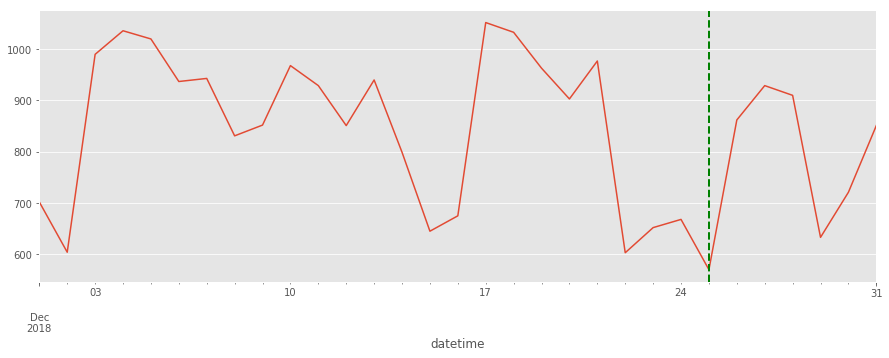

In [128]:
plt.figure(figsize=(15,5))

ax = plt.subplot(1, 1, 1)
result_timeseries['Unique Key'].resample('D').count().plot(ax=ax, legend=False)
ax.axvline(pd.to_datetime('2018-12-25'), color='g', linestyle='--', lw=2) # Note Christmas Day

plt.savefig("timeseries.pdf", transparent=True)
plt.show()

### Complaints by hour throughout December 2018

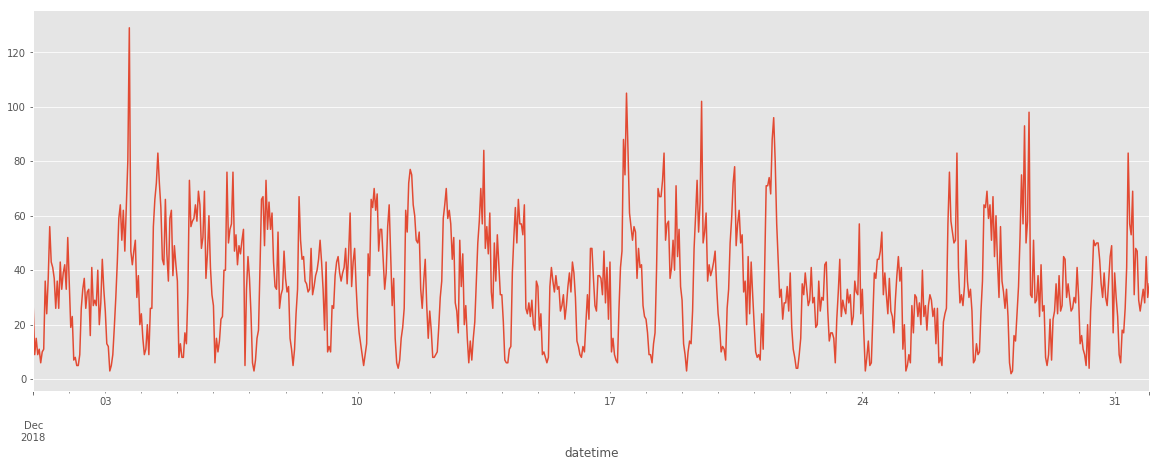

In [129]:
plt.figure(figsize=(20,7))

ax = plt.subplot(1, 1, 1)
result_timeseries['Unique Key'].resample('H').count().plot(ax=ax, legend=False)

plt.savefig("timeseries_byhour.pdf", transparent=True)
plt.show()

### When most complaints occur throughout the day

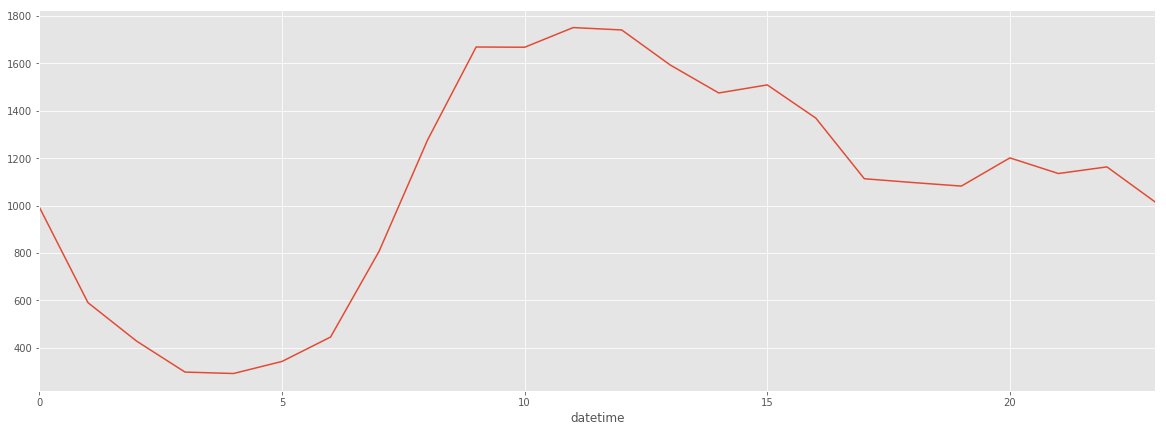

In [116]:
plt.figure(figsize=(20,7))
result_timeseries.groupby(result_timeseries.index.hour)['Unique Key'].count().plot()
plt.show()

### Resample so that we have a count per hour

In [121]:
hourly_resample = result_timeseries['Unique Key'].resample('H').count()
hourly_resample

datetime
2018-12-01 00:00:00    27
2018-12-01 01:00:00     9
2018-12-01 02:00:00    15
2018-12-01 03:00:00     9
2018-12-01 04:00:00    11
2018-12-01 05:00:00     6
2018-12-01 06:00:00    10
2018-12-01 07:00:00    11
2018-12-01 08:00:00    36
2018-12-01 09:00:00    24
2018-12-01 10:00:00    37
2018-12-01 11:00:00    56
2018-12-01 12:00:00    43
2018-12-01 13:00:00    41
2018-12-01 14:00:00    37
2018-12-01 15:00:00    26
2018-12-01 16:00:00    36
2018-12-01 17:00:00    26
2018-12-01 18:00:00    43
2018-12-01 19:00:00    33
2018-12-01 20:00:00    39
2018-12-01 21:00:00    42
2018-12-01 22:00:00    33
2018-12-01 23:00:00    52
2018-12-02 00:00:00    36
2018-12-02 01:00:00    19
2018-12-02 02:00:00    23
2018-12-02 03:00:00     7
2018-12-02 04:00:00     8
2018-12-02 05:00:00     5
                       ..
2018-12-30 18:00:00    30
2018-12-30 19:00:00    27
2018-12-30 20:00:00    36
2018-12-30 21:00:00    45
2018-12-30 22:00:00    49
2018-12-30 23:00:00    17
2018-12-31 00:00:00    39
201

### Groupby each hour of day, and see what the median number of complaints submitted was

In [127]:
hourly_resample.groupby(hourly_resample.index.hour).median()

datetime
0     33
1     18
2     12
3      9
4      9
5      9
6     13
7     26
8     38
9     58
10    57
11    56
12    57
13    50
14    48
15    47
16    41
17    34
18    33
19    33
20    36
21    38
22    36
23    33
Name: Unique Key, dtype: int64

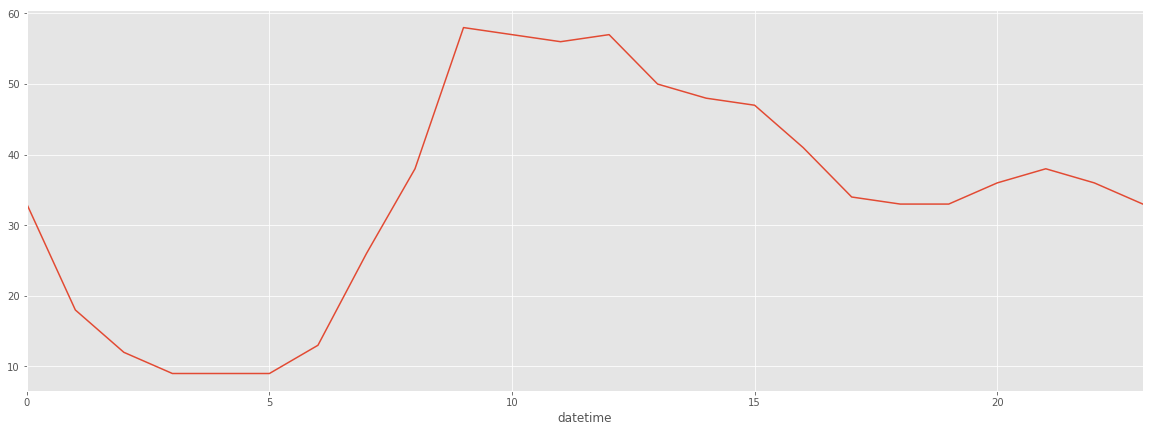

In [126]:
plt.figure(figsize=(20,7))
hourly_resample.groupby(hourly_resample.index.hour).median().plot()

# Histograms & Bar Chart

This allows us to look at what hours of the month looked like. Where most hours quite busy? We see below that only a few hours in December had over 100 complaints per hour. 

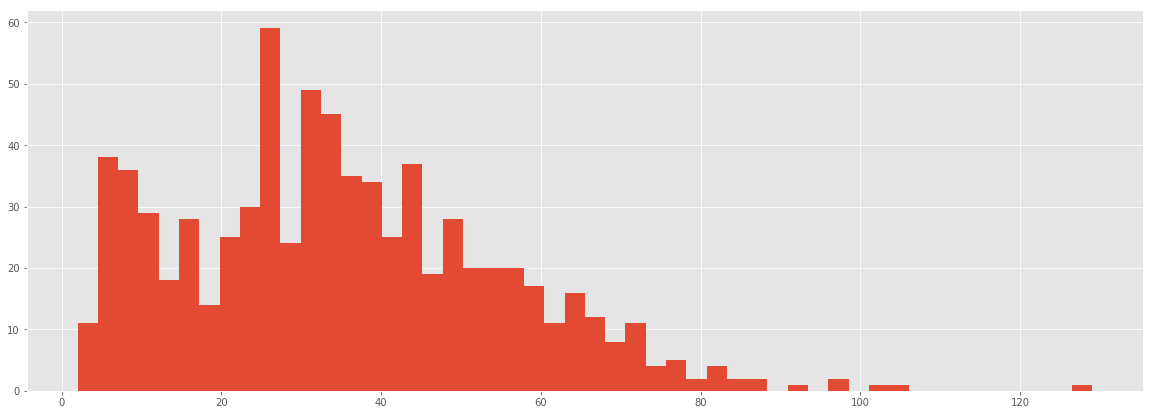

In [134]:
plt.figure(figsize=(20,7))
hourly_resample.hist(bins=50)

## Bar chart of common complaints

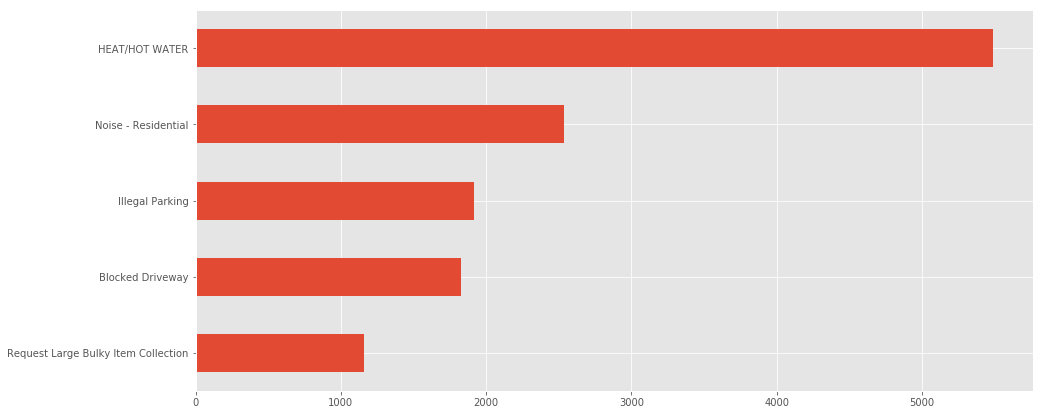

In [140]:
plt.figure(figsize=(15,7))
result['Complaint Type'].value_counts().head(5).plot(kind='barh')
plt.gca().invert_yaxis()

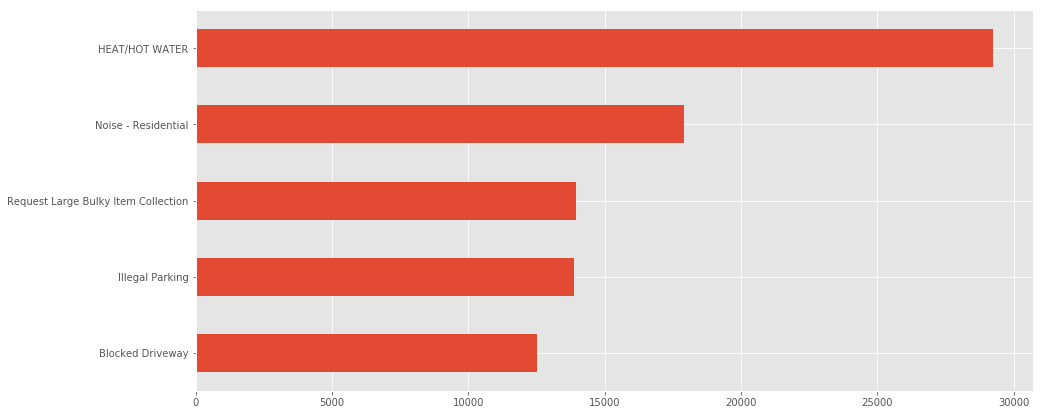

In [141]:
plt.figure(figsize=(15,7))
cleaned_zip_df['Complaint Type'].value_counts().head(5).plot(kind='barh')
plt.gca().invert_yaxis()

# Scatterplot

In [158]:
count_by_zip = cleaned_zip_df.groupby('zipcode')['Unique Key'].count()
count_by_zip

zipcode
00083       2
03108       1
07114       3
07960       1
10000       7
10001     801
10002    1714
10003    1437
10004     125
10005     161
10006      82
10007     287
10009    1176
10010     603
10011    1220
10012     761
10013     830
10014     799
10016    1330
10017     445
10018     340
10019    1617
10020      51
10021     622
10022     790
10023    1008
10024    1043
10025    1589
10026    1055
10027    1417
         ... 
11561       1
11565       1
11570       1
11572       1
11581       1
11590       1
11691    1110
11692     373
11693     284
11694     434
11697      26
11747       1
11757       1
11769       1
11797       1
11802       1
12222       1
12345       4
12346       1
13501       1
14614       1
17106       1
22304       1
29616       1
30189       1
32822       1
46216       1
49204       1
97911       1
98057       1
Name: Unique Key, Length: 266, dtype: int64

In [159]:
merged = pd.merge(enough_data, count_by_zip, on='zipcode')

In [160]:
merged.columns

Index(['JURISDICTION NAME', 'COUNT PARTICIPANTS', 'COUNT FEMALE',
       'PERCENT FEMALE', 'COUNT MALE', 'PERCENT MALE', 'COUNT GENDER UNKNOWN',
       'PERCENT GENDER UNKNOWN', 'COUNT GENDER TOTAL', 'PERCENT GENDER TOTAL',
       'COUNT PACIFIC ISLANDER', 'PERCENT PACIFIC ISLANDER',
       'COUNT HISPANIC LATINO', 'PERCENT HISPANIC LATINO',
       'COUNT AMERICAN INDIAN', 'PERCENT AMERICAN INDIAN',
       'COUNT ASIAN NON HISPANIC', 'PERCENT ASIAN NON HISPANIC',
       'COUNT WHITE NON HISPANIC', 'PERCENT WHITE NON HISPANIC',
       'COUNT BLACK NON HISPANIC', 'PERCENT BLACK NON HISPANIC',
       'COUNT OTHER ETHNICITY', 'PERCENT OTHER ETHNICITY',
       'COUNT ETHNICITY UNKNOWN', 'PERCENT ETHNICITY UNKNOWN',
       'COUNT ETHNICITY TOTAL', 'PERCENT ETHNICITY TOTAL',
       'COUNT PERMANENT RESIDENT ALIEN', 'PERCENT PERMANENT RESIDENT ALIEN',
       'COUNT US CITIZEN', 'PERCENT US CITIZEN', 'COUNT OTHER CITIZEN STATUS',
       'PERCENT OTHER CITIZEN STATUS', 'COUNT CITIZEN STATUS UNKN

In [161]:
merged

,JURISDICTION NAME,COUNT PARTICIPANTS,COUNT FEMALE,PERCENT FEMALE,COUNT MALE,PERCENT MALE,COUNT GENDER UNKNOWN,PERCENT GENDER UNKNOWN,COUNT GENDER TOTAL,PERCENT GENDER TOTAL,...,COUNT RECEIVES PUBLIC ASSISTANCE,PERCENT RECEIVES PUBLIC ASSISTANCE,COUNT NRECEIVES PUBLIC ASSISTANCE,PERCENT NRECEIVES PUBLIC ASSISTANCE,COUNT PUBLIC ASSISTANCE UNKNOWN,PERCENT PUBLIC ASSISTANCE UNKNOWN,COUNT PUBLIC ASSISTANCE TOTAL,PERCENT PUBLIC ASSISTANCE TOTAL,zipcode,Unique Key
0,10458,52,25,0.48,27,0.52,0,0,52,100,...,19,0.37,33,0.63,0,0,52,100,10458,2781
1,10463,59,33,0.56,26,0.44,0,0,59,100,...,20,0.34,39,0.66,0,0,59,100,10463,1752
2,10466,65,39,0.60,26,0.40,0,0,65,100,...,17,0.26,48,0.74,0,0,65,100,10466,1702
3,10467,106,65,0.61,41,0.39,0,0,106,100,...,33,0.31,73,0.69,0,0,106,100,10467,3203
4,10468,81,46,0.57,35,0.43,0,0,81,100,...,23,0.28,58,0.72,0,0,81,100,10468,2554
5,11218,111,97,0.87,14,0.13,0,0,111,100,...,51,0.46,60,0.54,0,0,111,100,11218,1697
6,11219,214,182,0.85,32,0.15,0,0,214,100,...,112,0.52,102,0.48,0,0,214,100,11219,1492
7,11223,109,53,0.49,56,0.51,0,0,109,100,...,20,0.18,89,0.82,0,0,109,100,11223,2187
8,11224,93,53,0.57,40,0.43,0,0,93,100,...,28,0.30,65,0.70,0,0,93,100,11224,504
9,11225,52,52,1.00,0,0.00,0,0,52,100,...,22,0.42,30,0.58,0,0,52,100,11225,2316


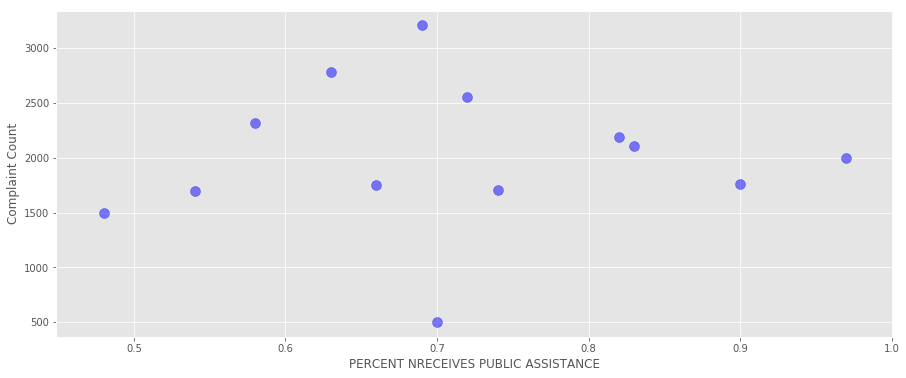

In [163]:
plt.figure(figsize=(15,6))
plt.scatter(merged['PERCENT NRECEIVES PUBLIC ASSISTANCE'], merged['Unique Key'], s=100, c='blue', alpha=0.5)
plt.xlabel('PERCENT NRECEIVES PUBLIC ASSISTANCE')
plt.ylabel('Complaint Count')
plt.show()

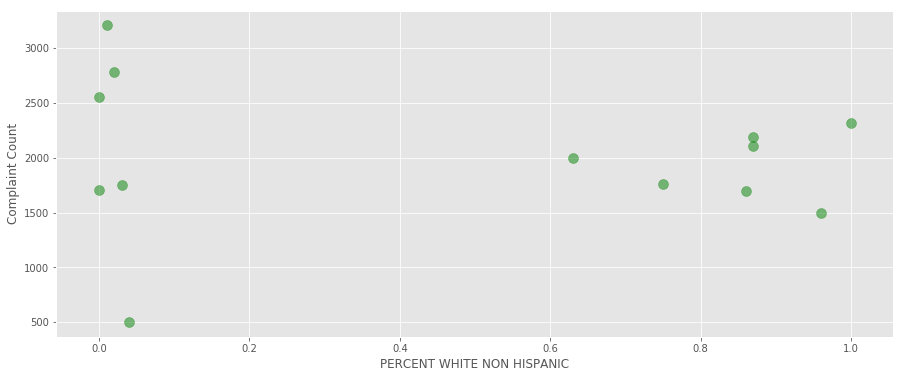

In [162]:
plt.figure(figsize=(15,6))
plt.scatter(merged['PERCENT WHITE NON HISPANIC'], merged['Unique Key'], s=100, c='green', alpha=0.5)
plt.xlabel('PERCENT WHITE NON HISPANIC')
plt.ylabel('Complaint Count')
plt.show()

The chart above is kind of interesting in that it seems to suggests that when zipcodes are more diverse (have more than 10% but less than 60% white people, there are fewer complaints. (Of course, we have to keep in mind the limitations of our data). 

### Let's visualize several kinds of complaint types at once! 

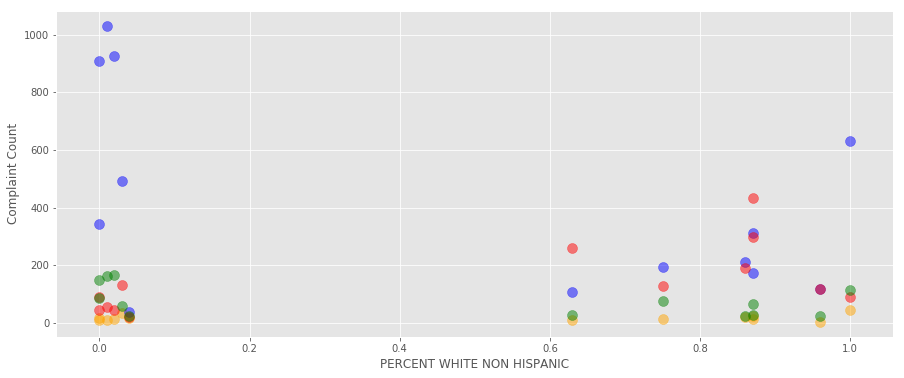

In [167]:
plt.figure(figsize=(15,6))

color_dict = {'Noise':'orange','HEAT/HOT WATER':'blue','Illegal Parking':'red','UNSANITARY CONDITION':'green'}

for complaint_type in ['Noise', 'HEAT/HOT WATER', 'Illegal Parking', 'UNSANITARY CONDITION']:
    
    selection = cleaned_zip_df[cleaned_zip_df['Complaint Type'] == complaint_type]
    count_by_zip = selection.groupby('zipcode')['Unique Key'].count()
    merged = pd.merge(enough_data, count_by_zip, on='zipcode')
    plt.scatter(merged['PERCENT WHITE NON HISPANIC'], merged['Unique Key'], s=100, c=color_dict[complaint_type], alpha=0.5)

plt.xlabel('PERCENT WHITE NON HISPANIC')
plt.ylabel('Complaint Count')
plt.show()

# Small Multiples

In [175]:
result_timeseries['Complaint Type'].value_counts()

HEAT/HOT WATER                         5486
Noise - Residential                    2535
Illegal Parking                        1913
Blocked Driveway                       1826
Request Large Bulky Item Collection    1159
UNSANITARY CONDITION                   1010
PAINT/PLASTER                           695
PLUMBING                                680
WATER LEAK                              566
Street Condition                        541
DOOR/WINDOW                             529
Water System                            518
Missed Collection (All Materials)       399
Derelict Vehicles                       384
Derelict Vehicle                        363
General Construction/Plumbing           355
Electronics Waste                       347
Sanitation Condition                    309
FLOORING/STAIRS                         292
Street Light Condition                  278
GENERAL                                 271
Sewer                                   268
ELECTRIC                        

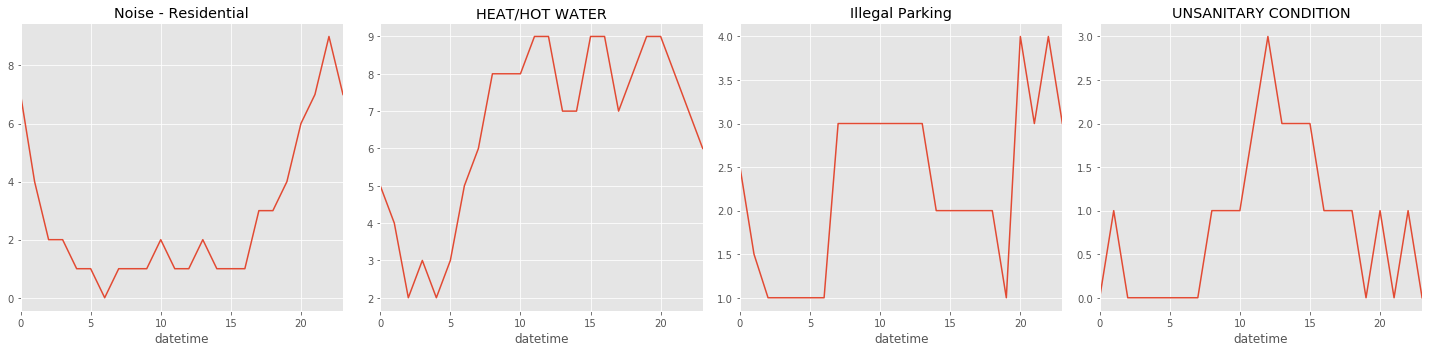

In [180]:
fig = plt.figure(figsize=(20,5))

plot_number = 1

for complaint_type in ['Noise - Residential', 'HEAT/HOT WATER', 'Illegal Parking', 'UNSANITARY CONDITION']:
    
    ax = plt.subplot(1, 4, plot_number)
    complaint_subset = result_timeseries[result_timeseries['Complaint Type'] == complaint_type]
    
    complaint_subset_hourly = complaint_subset['Unique Key'].resample('H').count()
    complaint_subset_hourly.groupby(complaint_subset_hourly.index.hour).median().plot()
    
    ax.set_title(complaint_type)
    plot_number = plot_number + 1

plt.tight_layout()
plt.show()

# Let's head over to Adobe Illustrator.

We're going to: 

1. Clean up the file

2. Change display attributes of similar items. 

3. Adjust colors, width, whitespace, fonts. 

4. Export! 